# Import dataset for analysis

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score, roc_curve

In [119]:
data = pd.read_csv("epi_r.csv")

In [120]:
data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,...,tree nut free,triple sec,tropical fruit,trout,tuna,turnip,utah,valentine's day,vanilla,veal,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
data.iloc[:,:20]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Spicy-Sweet Kumquats,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Korean Marinated Beef,4.375,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Ham Persillade with Mustard Potato Salad and M...,3.750,602.0,23.0,41.0,1696.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
data.shape

(20052, 680)

In [123]:
data.isnull().sum()

title                       0
rating                      0
calories                 4117
protein                  4162
fat                      4183
sodium                   4119
#cakeweek                   0
#wasteless                  0
22-minute meals             0
3-ingredient recipes        0
30 days of groceries        0
advance prep required       0
alabama                     0
alaska                      0
alcoholic                   0
almond                      0
amaretto                    0
anchovy                     0
anise                       0
anniversary                 0
anthony bourdain            0
aperitif                    0
appetizer                   0
apple                       0
apple juice                 0
apricot                     0
arizona                     0
artichoke                   0
arugula                     0
asian pear                  0
                         ... 
walnut                      0
wasabi                      0
washington

In [124]:
data.dropna(inplace = True)

In [125]:
data.isnull().sum()

title                    0
rating                   0
calories                 0
protein                  0
fat                      0
sodium                   0
#cakeweek                0
#wasteless               0
22-minute meals          0
3-ingredient recipes     0
30 days of groceries     0
advance prep required    0
alabama                  0
alaska                   0
alcoholic                0
almond                   0
amaretto                 0
anchovy                  0
anise                    0
anniversary              0
anthony bourdain         0
aperitif                 0
appetizer                0
apple                    0
apple juice              0
apricot                  0
arizona                  0
artichoke                0
arugula                  0
asian pear               0
                        ..
walnut                   0
wasabi                   0
washington               0
washington, d.c.         0
watercress               0
watermelon               0
w

In [126]:
data.shape

(15864, 680)

In [127]:
data['rating'].unique()

array([ 2.5  ,  4.375,  3.75 ,  3.125,  1.875,  5.   ,  0.   ,  1.25 ])

In [128]:
data.groupby('rating').count()

,title,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,...,tree nut free,triple sec,tropical fruit,trout,tuna,turnip,utah,valentine's day,vanilla,veal,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
rating,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,...,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296
1.250,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,...,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123
1.875,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81
2.500,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,...,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405
3.125,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,...,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165
3.750,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,...,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136
4.375,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,...,6552,6552,6552,6552,6552,6552

In [129]:
pd.set_option("max.columns",100)

In [130]:
data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,...,tree nut free,triple sec,tropical fruit,trout,tuna,turnip,utah,valentine's day,vanilla,veal,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
data.sum().sort_values(ascending = False)

title                      Lentil, Apple, and Turkey Wrap Boudin Blanc Te...
calories                                                         1.00747e+08
sodium                                                           9.91935e+07
fat                                                               5.5046e+06
protein                                                          1.59155e+06
rating                                                               59663.8
bon appétit                                                             7383
peanut free                                                             6721
soy free                                                                6502
gourmet                                                                 5683
tree nut free                                                           5616
vegetarian                                                              5529
kosher                                                                  4985

In [132]:
data.drop([col for col, val in data.sum().iteritems() if val < 50], axis=1, inplace=True)

In [133]:
data.sum().sort_values(ascending = False)

title                       Lentil, Apple, and Turkey Wrap Boudin Blanc Te...
calories                                                          1.00747e+08
sodium                                                            9.91935e+07
fat                                                                5.5046e+06
protein                                                           1.59155e+06
rating                                                                59663.8
bon appétit                                                              7383
peanut free                                                              6721
soy free                                                                 6502
gourmet                                                                  5683
tree nut free                                                            5616
vegetarian                                                               5529
kosher                                                          

In [134]:
data.shape

(15864, 343)

In [135]:
data.corr()

,rating,calories,protein,fat,sodium,advance prep required,alcoholic,almond,anise,anniversary,appetizer,apple,apricot,artichoke,arugula,asparagus,avocado,back to school,backyard bbq,bacon,bake,banana,basil,bass,bean,beef,beef tenderloin,beer,beet,bell pepper,berry,birthday,bitters,blackberry,blender,blue cheese,blueberry,boil,bon appétit,bourbon,braise,brandy,bread,breakfast,broccoli,broil,brunch,buffet,butter,buttermilk,...,spinach,spirit,spring,squash,steak,steam,stew,stir-fry,strawberry,stuffing/dressing,sugar conscious,sugar snap pea,summer,super bowl,sweet potato/yam,swiss cheese,tailgating,tarragon,tea,tequila,thanksgiving,thyme,tofu,tomatillo,tomato,tortillas,tree nut,tree nut free,triple sec,tuna,turnip,valentine's day,vanilla,veal,vegan,vegetable,vegetarian,vinegar,vodka,walnut,watercress,wedding,wheat/gluten-free,white wine,wine,winter,wok,yogurt,zucchini,turkey
rating,1.000000,0.007855,0.013971,0.007235,0.008146,-0.025939,-0.209148,0.005499,-0.002684,0.010505,0.023534,0.003790,0.009421,-0.004597,0.020244,0.012152,0.011746,0.016151,0.034004,0.028163,0.070332,-0.015264,0.011667,0.006899,0.003317,0.041673,0.025438,0.000728,0.001982,0.023459,0.006232,0.008668,-0.127979,0.007542,0.008222,0.017527,0.008267,0.000245,0.129069,0.004049,0.042613,-0.059976,-0.013182,0.000763,0.000703,0.037252,0.011115,0.020471,-0.029770,-0.024890,...,0.011008,-0.135300,0.027468,0.012092,0.031207,0.007310,0.012482,0.005968,0.001821,0.033148,0.036155,0.001043,0.023999,0.023038,0.021663,0.003772,0.003005,0.000200,-0.050875,-0.010928,0.060912,0.019887,-0.008258,0.022845,0.040270,0.003439,-0.032549,0.069766,-0.022137,0.017412,0.003434,0.014841,0.009048,0.015616,-0.054632,0.022903,0.020139,0.002543,-0.022159,-0.001504,0.001504,-0.001045,0.014778,0.027213,-0.004633,0.058439,0.000602,-0.013485,0.001311,0.022338
calories,0.007855,1.000000,0.742816,0.996538,0.996392,-0.001083,-0.003346,0.000574,-0.001254,-0.001181,-0.004423,0.000206,0.017579,-0.001410,-0.001835,-0.001615,-0.001886,-0.001585,0.000543,-0.002866,0.024090,-0.001453,-0.002772,-0.001021,-0.002676,-0.003230,-0.000936,-0.001102,-0.001648,-0.003165,0.049011,-0.001540,-0.001186,-0.001398,-0.002956,-0.001783,0.054028,-0.002431,-0.008202,-0.001234,0.008802,-0.001925,-0.002733,-0.003095,-0.001167,-0.002518,-0.003394,-0.001345,-0.001532,-0.000957,...,-0.002190,-0.001665,-0.004926,-0.001336,-0.001690,-0.001703,-0.001469,-0.001771,-0.001979,-0.001382,-0.006095,-0.000978,0.006642,-0.001997,-0.001837,-0.001034,-0.001214,-0.001794,-0.001232,-0.001157,0.028044,-0.002092,-0.000972,-0.001126,-0.005553,-0.001326,-0.001141,-0.009015,-0.001081,-0.001249,-0.001118,-0.001661,-0.001908,-0.001307,-0.005392,-0.000926,0.004979,-0.003154,-0.001367,0.048326,-0.001360,-0.001193,-0.000719,-0.002607,-0.001584,0.011178,-0.001222,-0.002496,-0.001979,-0.002267
protein,0.013971,0.742816,1.000000,0.712194,0.749287,-0.001244,-0.005073,0.001528,-0.001644,-0.001344,-0.005876,0.001146,0.009614,-0.001590,-0.002269,-0.001859,-0.002469,-0.001976,0.009556,-0.003144,0.011267,-0.002136,-0.003382,-0.000936,-0.003039,-0.002768,-0.000634,-0.001234,-0.002263,-0.003762,0.028530,-0.002210,-0.001795,-0.002048,-0.003954,-0.002266,0.032407,-0.003193,-0.012255,-0.001708,0.056465,-0.002655,-0.003867,-0.004255,-0.001478,-0.002761,-0.004658,-0.001671,-0.002141,-0.001280,...,-0.002743,-0.002503,-0.006061,-0.001809,-0.001646,-0.002172,-0.001184,-0.002132,-0.002964,-0.001821,-0.007560,-0.001143,0.004042,-0.002139,-0.002348,-0.001222,-0.001332,-0.002091,-0.001800,-0.001690,0.019099,-0.002316,-0.001177,-0.001504,-0.006254,-0.001597,-0.001623,0.000687,-0.001644,-0.001378,-0.001364,-0.002121,-0.002856,-0.000823,-0.007919,0.017960,-0.005666,-0.004082,-0.002044,0.028235,-0.001683,-0.001764,0.009050,-0.002303,-0.001958,0.021620,-0.001437,-0.003120,-0.002566,-0.000748
fat,0.007235,0.996538,0.712194,1.000000,0.986476,-0.001033,-0.003316,0.000612,-0.001217,-0.001123,-0.004207,0.000220,0.017754,-0.001334,-0.001741,-0.001535,-0.001779,-0.001518,-0.002515,-0.002723,

In [136]:
data_corr = data.corr().abs()
sorted_corr = data_corr.unstack()
sortedorder = sorted_corr.sort_values(ascending = False)


In [137]:
sortedorder[343:500]

fat                calories             0.996538
calories           sodium               0.996392
sodium             calories             0.996392
fat                sodium               0.986476
sodium             fat                  0.986476
peanut free        soy free             0.941653
soy free           peanut free          0.941653
kosher             pescatarian          0.878729
pescatarian        kosher               0.878729
drink              alcoholic            0.851959
alcoholic          drink                0.851959
peanut free        tree nut free        0.822871
tree nut free      peanut free          0.822871
soy free           tree nut free        0.793142
tree nut free      soy free             0.793142
sodium             protein              0.749287
protein            sodium               0.749287
pescatarian        vegetarian           0.743036
vegetarian         pescatarian          0.743036
calories           protein              0.742816
protein            c

In [138]:
data.head()

,title,rating,calories,protein,fat,sodium,advance prep required,alcoholic,almond,anise,anniversary,appetizer,apple,apricot,artichoke,arugula,asparagus,avocado,back to school,backyard bbq,bacon,bake,banana,basil,bass,bean,beef,beef tenderloin,beer,beet,bell pepper,berry,birthday,bitters,blackberry,blender,blue cheese,blueberry,boil,bon appétit,bourbon,braise,brandy,bread,breakfast,broccoli,broil,brunch,buffet,butter,...,spinach,spirit,spring,squash,steak,steam,stew,stir-fry,strawberry,stuffing/dressing,sugar conscious,sugar snap pea,summer,super bowl,sweet potato/yam,swiss cheese,tailgating,tarragon,tea,tequila,thanksgiving,thyme,tofu,tomatillo,tomato,tortillas,tree nut,tree nut free,triple sec,tuna,turnip,valentine's day,vanilla,veal,vegan,vegetable,vegetarian,vinegar,vodka,walnut,watercress,wedding,wheat/gluten-free,white wine,wine,winter,wok,yogurt,zucchini,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
data.set_index('title', inplace = True)

In [140]:
data.head()

,rating,calories,protein,fat,sodium,advance prep required,alcoholic,almond,anise,anniversary,appetizer,apple,apricot,artichoke,arugula,asparagus,avocado,back to school,backyard bbq,bacon,bake,banana,basil,bass,bean,beef,beef tenderloin,beer,beet,bell pepper,berry,birthday,bitters,blackberry,blender,blue cheese,blueberry,boil,bon appétit,bourbon,braise,brandy,bread,breakfast,broccoli,broil,brunch,buffet,butter,buttermilk,...,spinach,spirit,spring,squash,steak,steam,stew,stir-fry,strawberry,stuffing/dressing,sugar conscious,sugar snap pea,summer,super bowl,sweet potato/yam,swiss cheese,tailgating,tarragon,tea,tequila,thanksgiving,thyme,tofu,tomatillo,tomato,tortillas,tree nut,tree nut free,triple sec,tuna,turnip,valentine's day,vanilla,veal,vegan,vegetable,vegetarian,vinegar,vodka,walnut,watercress,wedding,wheat/gluten-free,white wine,wine,winter,wok,yogurt,zucchini,turkey
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
#Assign features to variable X
X = data.drop("rating", axis = 1)
#Assign target column to variable y
y = data.rating

In [142]:
#Apply train test split to separate the data first before conducting PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)

In [143]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [144]:
#Intialize scaler

scaler = StandardScaler()

#Fit and transform X train data using standard scaler

X_trains = scaler.fit_transform(X_train)

In [145]:
#Intialize PCA object
#We're deliberating leaving the n_components parameters alone

pca = PCA()

#Fit and transform x_train use pca

X_trains_pca = pca.fit_transform(X_trains)

#Number of components
pca.n_components_

341L

In [146]:
#Shows the percentage of the variance explained by each component
pca.explained_variance_ratio_

array([  2.13889907e-02,   1.73089063e-02,   1.39310195e-02,
         1.03535120e-02,   1.03044620e-02,   9.07559675e-03,
         8.53923314e-03,   7.57245474e-03,   7.05028474e-03,
         6.97690285e-03,   6.89514063e-03,   6.51401340e-03,
         6.50697090e-03,   6.41305374e-03,   6.08444113e-03,
         5.98297488e-03,   5.77208958e-03,   5.73071571e-03,
         5.54561655e-03,   5.46941145e-03,   5.37278604e-03,
         5.23924578e-03,   5.10534967e-03,   5.03803546e-03,
         4.97618260e-03,   4.85405689e-03,   4.78746121e-03,
         4.75495292e-03,   4.71419594e-03,   4.68373823e-03,
         4.65391860e-03,   4.59554247e-03,   4.53156414e-03,
         4.49204102e-03,   4.44504338e-03,   4.34525453e-03,
         4.31025759e-03,   4.27398670e-03,   4.22198135e-03,
         4.20792246e-03,   4.17464584e-03,   4.10529596e-03,
         4.08126217e-03,   4.05375220e-03,   4.00104374e-03,
         3.99023480e-03,   3.97972838e-03,   3.95129116e-03,
         3.92855637e-03,

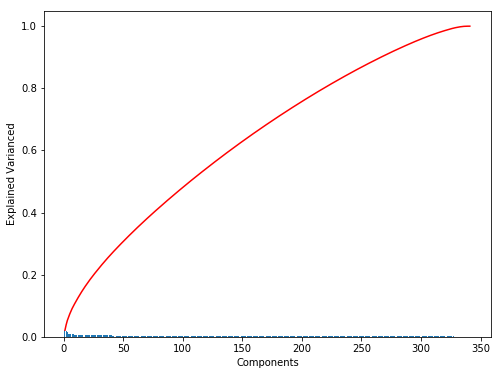

In [147]:
plt.figure(figsize=(8, 6))

components = range(1, pca.n_components_ + 1)

plt.bar(components, pca.explained_variance_ratio_, label = "Explained Variance Ratio")
plt.plot(components, np.cumsum(pca.explained_variance_ratio_), c = "r", label = "Cumulative Sum of Explained Variance ratios")
plt.xlabel("Components")
plt.ylabel("Explained Varianced")

# Cross validate model based on linear regression models

In [148]:
cross_val_score(LinearRegression(), X_trains_pca, y_train, cv = 5, scoring = "r2")

array([  0.11698024,   0.1571365 ,   0.06027275,   0.11401434, -20.34055847])

In [149]:
#Intialize PCA object
#Initialize to explain 90% of variance and test if the CV score will improve

pca2 = PCA(n_components=.9)

#Fit and transform x_train use pca

X_trains_pca2 = pca2.fit_transform(X_trains)

#Number of components
pca2.n_components_

267

In [150]:
#cross validation 
cross_val_score(LinearRegression(), X_trains_pca2, y_train, cv = 5, scoring = "r2")

array([ 0.12427559,  0.15010967,  0.06875929,  0.12767965,  0.13347173])

In [151]:
#pca_range = np.arange(0.0, 1.0, 0.1)
#pca_range

In [152]:
pca = PCA(n_components= 40)
X_trains_pca = pca.fit_transform(X_trains)
cross_val_score(LinearRegression(), X_trains_pca, y_train, cv = 5, scoring = "r2")

array([ 0.10667038,  0.1165517 ,  0.09264508,  0.11545806,  0.10729595])

In [153]:
pca_range = range(20, 340, 20)

cv_scores = []

for i in pca_range:
    pca = PCA(n_components= i)
    X_trains_pca = pca.fit_transform(X_trains)
    cv = cross_val_score(LinearRegression(), X_trains_pca, y_train, cv = 5, scoring = "r2")
    cv_mean = cv.mean()
    cv_scores.append(cv_mean)
    


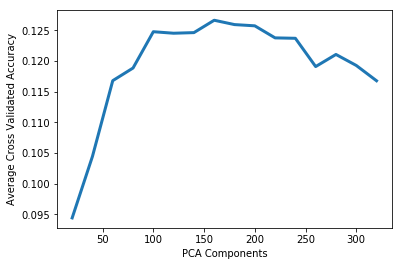

In [154]:
plt.plot(pca_range, cv_scores, linewidth = 3)
plt.xlabel("PCA Components")
plt.ylabel("Average Cross Validated Accuracy");

In [155]:
#Put scores in a data frame
PCA_CV_Scores = pd.DataFrame(list(zip(pca_range, cv_scores)), columns=["PCA Components", "CV Score"])
PCA_CV_Scores 

,PCA Components,CV Score
0,20,0.094400
1,40,0.104433
2,60,0.116783
3,80,0.118844
4,100,0.124763
5,120,0.124516
6,140,0.124616
7,160,0.126634
8,180,0.125926
9,200,0.125724


In [156]:
PCA_CV_Scores.loc[PCA_CV_Scores['CV Score'].idxmax()]

PCA Components    160.000000
CV Score            0.126634
Name: 7, dtype: float64

In [157]:
#Fit and transform X test data using standard scaler

X_tests = scaler.fit_transform(X_test)

#Apply best PCA components to test data

pca = PCA(n_components=140)
X_tests_pca = pca.fit_transform(X_tests)
cross_val_score(LinearRegression(), X_tests_pca, y_test, cv = 5, scoring = "r2").mean()

0.073547469081744074

# Test how effective other models are

In [158]:
from sklearn.pipeline import Pipeline


In [ ]:
#Answer

depths = range(1, 21)

cv_scores = []

for i in depths:
    cv = cross_val_score(DecisionTreeClassifier(max_depth=i), X, y, cv =5, scoring="accuracy")
    cv_mean = cv.mean()
    cv_scores.append(cv_mean)
    
plt.plot(depths, cv_scores, linewidth = 3)
plt.xlabel("Max Depth Values")
plt.ylabel("Average Cross Validated Accuracy");

In [ ]:
#Decision_Tree = Pipeline([
    ('scaling', StandardScaler()), 
    ('pca', PCA(n_components=5)),
    ('classifier', KNeighborsClassifier())])

#knn.score(X_train, y_train)
#knn.score(X_test, y_test)